<a href="https://colab.research.google.com/github/jholov/MLA_JWH/blob/main/FinalProject_Regression_JWH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Final Project Classification - Linear Regression
by Jake Holovka

#Standard Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


#Imports for Splitting Data and Building Pipeline

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display='diagram')
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

#Imports for Performance Measures

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

#Confusion Matrix Function

In [ ]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

#Imports for specific models

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC, SVR, LinearSVC, LinearSVR
from sklearn.model_selection import GridSearchCV

#Linear Regression - Acquire Data

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/CS430/graduation_rate.csv')
df.columns

Index(['ACT composite score', 'SAT total score', 'parental level of education',
       'parental income', 'high school gpa', 'college gpa',
       'years to graduate'],
      dtype='object')

In [ ]:
df.rename(columns={'ACT composite score' : 'act_composite_score', 'SAT total score' : 'sat_total_score', 'parental level of education':'parental_lvl_educ','parental income' : 'parental_income', 'high school gpa' : 'high_school_gpa', 'college gpa' : 'college_gpa', 'years to graduate': 'years_to_graduate'}, inplace = True)

#Statistics and Visual Exploration

In [ ]:
df.describe()

,act_composite_score,sat_total_score,parental_income,high_school_gpa,college_gpa,years_to_graduate
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,28.607000,1999.906000,67377.85200,3.707400,3.376500,4.982000
std,2.774211,145.078361,18827.33105,0.287381,0.237179,1.414099
min,20.000000,1598.000000,18906.00000,2.800000,2.600000,3.000000
25%,27.000000,1898.000000,54269.75000,3.500000,3.200000,4.000000
50%,28.500000,2000.000000,67842.50000,3.800000,3.400000,5.000000
75%,31.000000,2099.000000,80465.50000,4.000000,3.500000,6.000000
max,36.000000,2385.000000,124470.00000,4.000000,4.000000,10.000000


In [ ]:
df.corr()

<ipython-input-249-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,act_composite_score,sat_total_score,parental_income,high_school_gpa,college_gpa,years_to_graduate
act_composite_score,1.000000,0.889816,0.203207,0.873126,0.501218,-0.044162
sat_total_score,0.889816,1.000000,0.273487,0.908418,0.533280,-0.069264
parental_income,0.203207,0.273487,1.000000,0.266822,0.463646,-0.213390
high_school_gpa,0.873126,0.908418,0.266822,1.000000,0.517441,-0.040068
college_gpa,0.501218,0.533280,0.463646,0.517441,1.000000,-0.440587
years_to_graduate,-0.044162,-0.069264,-0.213390,-0.040068,-0.440587,1.000000


In [ ]:
lt_counts = df['years_to_graduate'].value_counts()
lt_counts

4     327
5     258
6     164
3     112
7      70
8      49
9      18
10      2
Name: years_to_graduate, dtype: int64

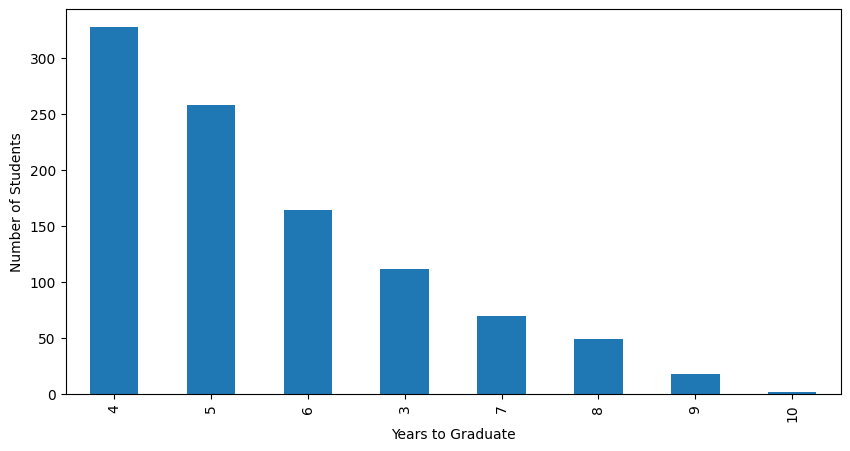

In [ ]:
ax = lt_counts.plot(kind='bar', xlabel ='Years to Graduate', ylabel = 'Number of Students', figsize=(10,5))


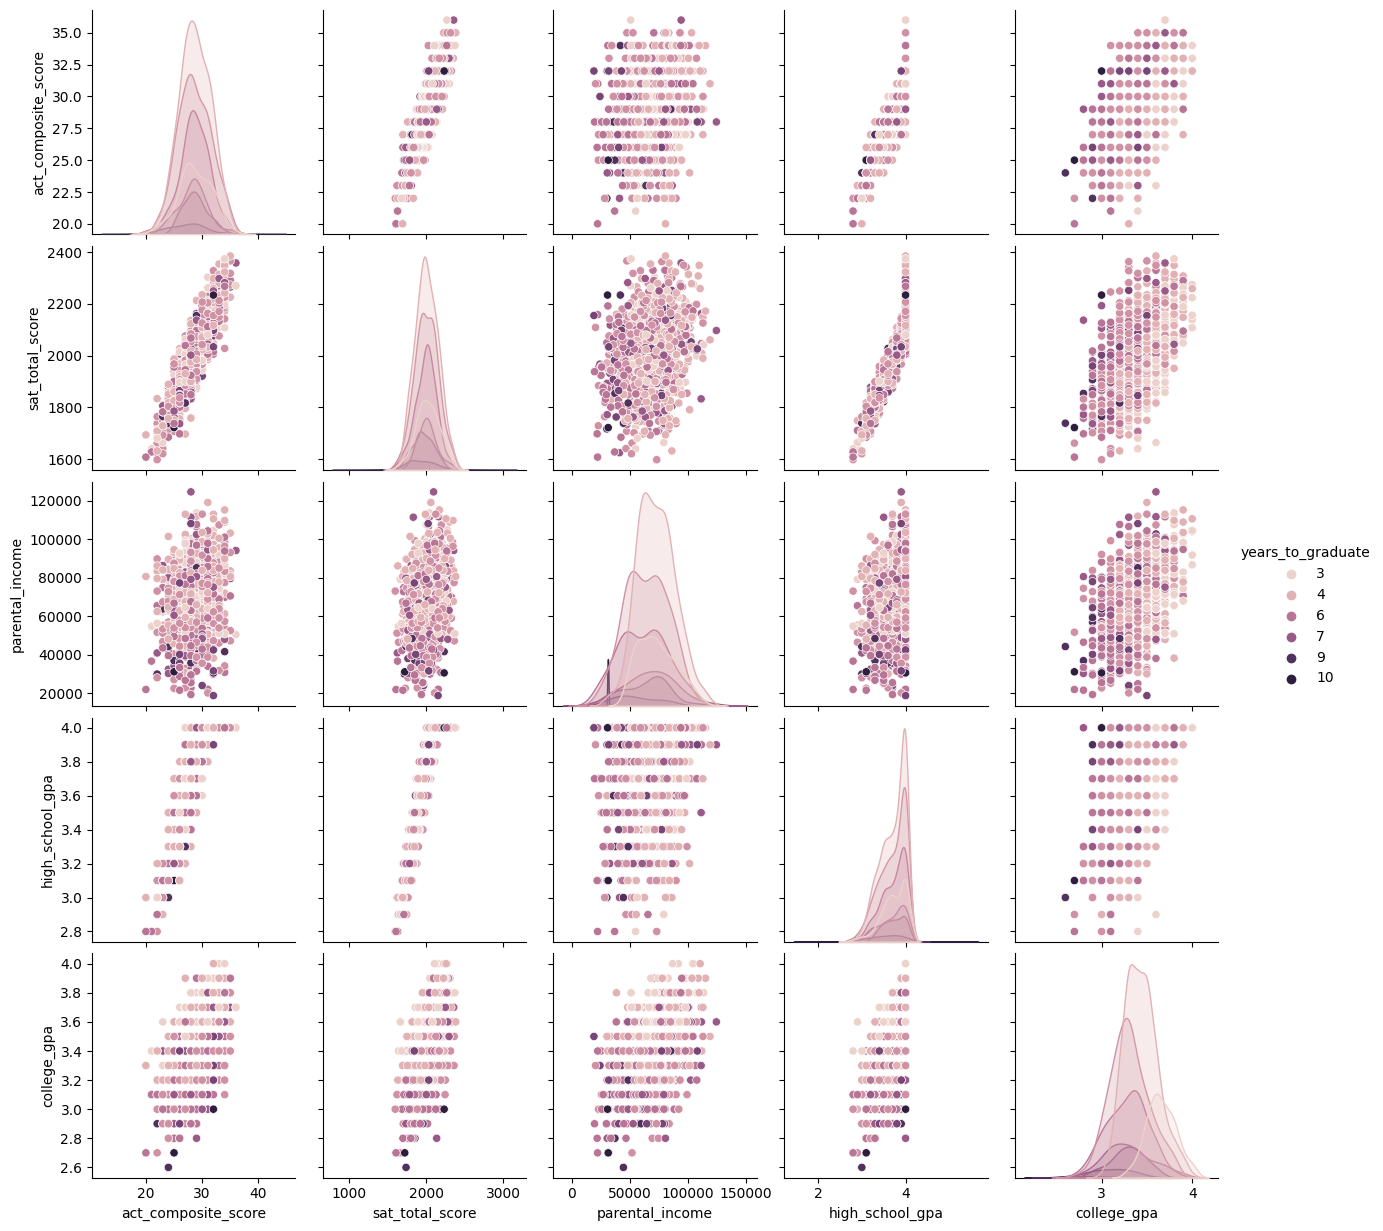

In [ ]:
sns.pairplot(df, hue="years_to_graduate");


#Mark Up Section

You can see that high sat and act scores compared with higher college gpa tends to lead to a shorter time to graduate indicating an inverse relationship between the two. You can also see a relationship as parental income increases it does tend to lead to higher college gpas.

#Splitting Data into Train/Test

In [ ]:
df.columns


Index(['act_composite_score', 'sat_total_score', 'parental_lvl_educ',
       'parental_income', 'high_school_gpa', 'college_gpa',
       'years_to_graduate'],
      dtype='object')

In [ ]:
X = df[['act_composite_score', 'sat_total_score', 'parental_lvl_educ',
       'parental_income', 'high_school_gpa', 'college_gpa']]
y = df['years_to_graduate']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state = 32)

#Building the Pipeline

In [ ]:
num_attribs = ['act_composite_score', 'sat_total_score', 'parental_income', 'high_school_gpa', 'college_gpa' ]
cat_attribs = ['parental_lvl_educ']

In [ ]:
col_transform = ColumnTransformer(transformers=[
                                ('cat',OneHotEncoder(),cat_attribs),
                                ('num',MinMaxScaler(),num_attribs)],
                                remainder='passthrough'
)

In [ ]:
pipeline = Pipeline([
                    ('transform',col_transform),
                    ('mlr_model',LinearRegression()),
])   

#Executing the Model

In [ ]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', OneHotEncoder(),
                                                  ['parental_lvl_educ']),
                                                 ('num', MinMaxScaler(),
                                                  ['act_composite_score',
                                                   'sat_total_score',
                                                   'parental_income',
                                                   'high_school_gpa',
                                                   'college_gpa'])])),
                ('mlr_model', LinearRegression())])

#Evaluating the Model

In [ ]:
y_pred = pipeline.predict(X_test)
y_train_pred = pipeline.predict(X_train)

In [ ]:
print(mean_squared_error(y_test,y_pred)**(.05))

1.0252084906688308


In [ ]:
print(mean_squared_error(y_train,y_train_pred)**(.05))

1.0195023967568917


These values of 1 are not very good considering we are dealing with years for how long it would take to graduate but they could be worse as our scale is between 4-10 years.  

In [ ]:
r2_score(y_pred,y_test)

-2.2019365759866325

This r2 score is not good however indicating that this data set does not do well with the linear regression algorithm. Perhaps the SVC model will perform better but I imagine it will only be a slight improvement.

#Conclusion
This model does not perform that well with calculating the years it would take to graduate. The linear regression model is not the greatest fit for this data set and other algorithms could perform better.

#Final Project -SVC

#Building the Pipeline

In [ ]:
pipeline = Pipeline([
                    ('trans',col_transform),
                    ('SVR', SVR(kernel='poly', C=20, max_iter=10000, epsilon=0.0)),
])                

#Executing the Model

In [ ]:
pipeline.fit(X_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Pipeline(steps=[('trans',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', OneHotEncoder(),
                                                  ['parental_lvl_educ']),
                                                 ('num', MinMaxScaler(),
                                                  ['act_composite_score',
                                                   'sat_total_score',
                                                   'parental_income',
                                                   'high_school_gpa',
                                                   'college_gpa'])])),
                ('SVR', SVR(C=20, epsilon=0.0, kernel='poly', max_iter=10000))])

#Evaluating Model

In [ ]:
y_pred = pipeline.predict(X_test)
y_train_pred = pipeline.predict(X_train)

In [ ]:
print(mean_squared_error(y_test,y_pred)**(.05))

1.0304085435458108


In [ ]:
print(mean_squared_error(y_train,y_train_pred)**(.05))

1.0193839255588302


In [ ]:
r2_score(y_pred,y_test)

-1.628274104854706

#Conclusion
This SVC model performed similar to the linear model. It was able to get a better r2_score but it is still negative indicating it is not the best fit for it. Both the train and test mean squarred error are similar meaning that it is consistent. This data set might benefit more from a decision tree model.

#Grid Search


In [ ]:
grid_param = {'SVR__C' : [1,10,25,50,75]}


In [ ]:
col_transform = ColumnTransformer(transformers=[
                                ('cat',OneHotEncoder(),cat_attribs),
                                ('num',MinMaxScaler(),num_attribs)],
                                remainder='passthrough'
)

In [ ]:
pipeline = Pipeline([
                    ('trans',col_transform),
                    ('SVR', SVR(kernel='poly', C=20, max_iter=10000, epsilon=0.0)),
])                

In [ ]:
grid_pipeline = GridSearchCV(pipeline, grid_param)

#Executing the GridSearch Model

In [ ]:
grid_pipeline.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider

GridSearchCV(estimator=Pipeline(steps=[('trans',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('cat',
                                                                         OneHotEncoder(),
                                                                         ['parental_lvl_educ']),
                                                                        ('num',
                                                                         MinMaxScaler(),
                                                                         ['act_composite_score',
                                                                          'sat_total_score',
                                                                          'parental_income',
                                                                          'high_school_gpa',
                                                                          'college_gpa'])])),
                                       ('SVR',
                                        SVR(C=20, epsilon=0.0, kernel='poly',
                                            max_iter=10000))]),
             param_grid={'SVR__C': [1, 10, 25, 50, 75]})

In [ ]:
y_pred = pipeline.predict(X_test)
y_train_pred = pipeline.predict(X_train)

NotFittedError: ignored

Not sure why this isn't working